# Regression

In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
df=pd.read_csv('world_happiness_report_2018.csv',engine='python')


In [3]:
df

,ï»؟Country,year,LifeLadder,LogGDPpercapita,Socialsupport,Healthylifeexpectancyatbirth,Freedomtomakelifechoices,Generosity,Perceptionsofcorruption,Positiveaffect,Negativeaffect,Confidenceinnationalgovernment,DemocraticQuality,DeliveryQuality,Standarddeviationofladderbycountry-year,Standarddeviation/Meanofladderbycountry-year,GINIindex(WorldBankestimate),"GINIindex(WorldBankestimate),average2000-15","giniofhouseholdincomereportedinGallup,bywp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1557,Zimbabwe,2013,4.690188,7.565154,0.799274,48.949745,0.575884,-0.076716,0.830937,0.711885,0.182288,0.527755,-1.026085,-1.526321,1.964805,0.418918,NaN,0.432,0.555439
1558,Zimbabwe,2014,4.184451,7.562753,0.765839,50.051235,0.642034,-0.045885,0.820217,0.725214,0.239111,0.566209,-0.985267,-1.484067,2.079248,0.496899,NaN,0.432,0.601080
1559,Zimbabwe,2015,3.703191,7.556052,0.735800,50.925652,0.667193,-0.094585,0.810457,0.715079,0.178861,0.590012,-0.893078,-1.357514,2.198865,0.593776,NaN,0.432,0.655137
1560,Zimbabwe,2016,3.735400,7.538829,0.768425,51.800068,0.732971,-0.065283,0.723612,0.737636,0.208555,0.699344,-0.863044,-1.371214,2.776363,0.743257,NaN,0.432,0.596690


In [4]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean',verbose=0)
dfn=df

In [5]:
imputer = imputer.fit(dfn.iloc[:,3:14])
dfn.iloc[:,3:14]=imputer.transform(dfn.iloc[:,3:14])

In [6]:
imputer = imputer.fit(dfn.iloc[:,16:19])
dfn.iloc[:,16:19]=imputer.transform(dfn.iloc[:,16:19])

In [7]:
dfn.isnull().sum()


ï»؟Country                                          0
year                                                0
LifeLadder                                          0
LogGDPpercapita                                     0
Socialsupport                                       0
Healthylifeexpectancyatbirth                        0
Freedomtomakelifechoices                            0
Generosity                                          0
Perceptionsofcorruption                             0
Positiveaffect                                      0
Negativeaffect                                      0
Confidenceinnationalgovernment                      0
DemocraticQuality                                   0
DeliveryQuality                                     0
Standarddeviationofladderbycountry-year             0
Standarddeviation/Meanofladderbycountry-year        0
GINIindex(WorldBankestimate)                        0
GINIindex(WorldBankestimate),average2000-15         0
giniofhouseholdincomereporte

In [8]:
from sklearn.preprocessing import OneHotEncoder
e=OneHotEncoder(sparse=False)
country=e.fit_transform(dfn[['ï»؟Country']])
dfn['ï»؟Country']=country


In [9]:
x=dfn[['ï»؟Country','year','Healthylifeexpectancyatbirth','LogGDPpercapita','Socialsupport','Freedomtomakelifechoices','Generosity','Perceptionsofcorruption','Positiveaffect','Negativeaffect','Confidenceinnationalgovernment','DemocraticQuality','DeliveryQuality','Standarddeviationofladderbycountry-year','Standarddeviation/Meanofladderbycountry-year','GINIindex(WorldBankestimate)','GINIindex(WorldBankestimate),average2000-15','giniofhouseholdincomereportedinGallup,bywp5-year']]

In [10]:
y=dfn[['LifeLadder']]
y

,LifeLadder
0,3.723590
1,4.401778
2,4.758381
3,3.831719
4,3.782938
...,...
1557,4.690188
1558,4.184451
1559,3.703191
1560,3.735400


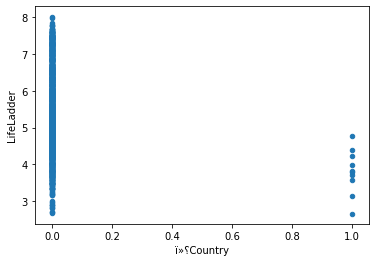

In [11]:
XL=df['ï»؟Country']
YL=df['LifeLadder']
df.plot( 'ï»؟Country', 'LifeLadder' ,kind='scatter')

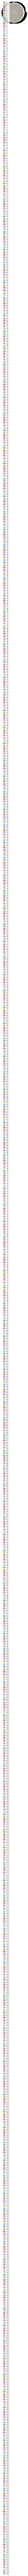

In [12]:
df.plot('ï»؟Country' , 'LifeLadder' ,kind='pie')

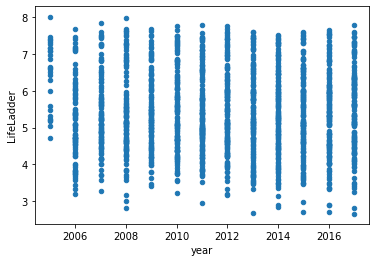

In [13]:
df.plot('year' , 'LifeLadder' ,kind='scatter')

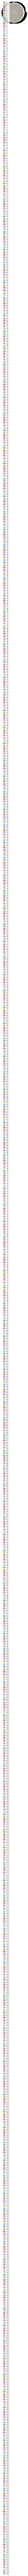

In [14]:
df.plot('year' , 'LifeLadder' ,kind='pie')

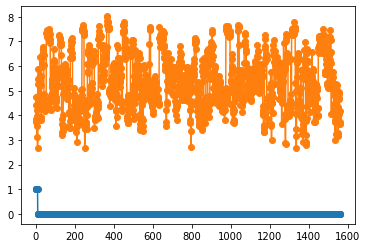

In [15]:
plt.plot(XL, '-o', YL, '-o')

<BarContainer object of 1562 artists>

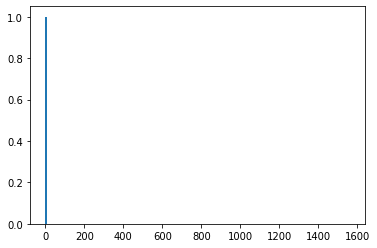

In [16]:
plt.bar(range(len(XL)),XL)

<BarContainer object of 1562 artists>

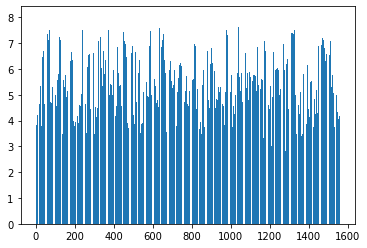

In [17]:
plt.bar(range(len(XL)),YL)

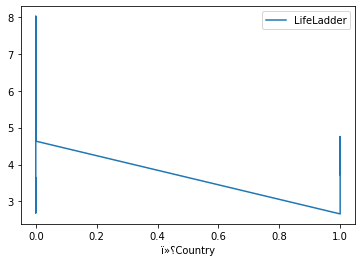

In [18]:
df.plot('ï»؟Country' , 'LifeLadder' )

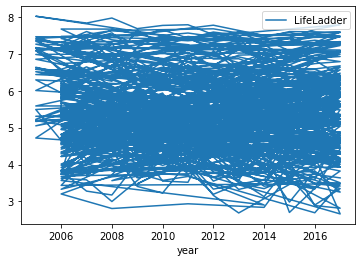

In [19]:
df.plot('year' , 'LifeLadder' )

{'whiskers': [<matplotlib.lines.Line2D at 0x2470548cc48>,
 'caps': [<matplotlib.lines.Line2D at 0x2470548eb88>,
 'boxes': [<matplotlib.lines.Line2D at 0x247054888c8>],
 'medians': [<matplotlib.lines.Line2D at 0x24705491ac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x24705491bc8>],
 'means': []}

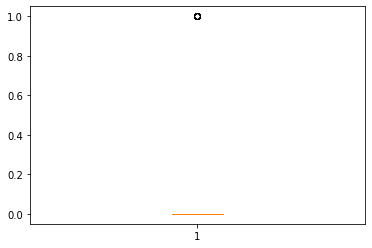

In [20]:
plt.boxplot(XL)

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2)

In [22]:
from sklearn import linear_model
clf=linear_model.LinearRegression()
clf.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
y_predict=clf.predict(X_test)

In [24]:
print('linear model coeff (w)',clf.coef_)
print('linear model intetrcept (b)',clf.intercept_)
print('R_squared score (training)',clf.score(X_train,Y_train))
print('R_squared score (test)',clf.score(X_test,Y_test))

linear model coeff (w) [[ 2.97751161e-02  3.35078852e-03 -1.24395085e-03  1.40373041e-01
   3.02637846e-01  1.63629751e-01  4.29387398e-01 -7.27937023e-01
   7.20663877e-01  7.15680971e-01 -2.05701658e-01  2.61979173e-02
   7.30047197e-02  1.74275771e+00 -9.09051058e+00 -1.65419729e-01
  -2.31936223e-01  1.01554247e-01]]
linear model intetrcept (b) [-2.80103106]
R_squared score (training) 0.9299614946921622
R_squared score (test) 0.9331430300084975


In [25]:
from sklearn.linear_model import Ridge
linridge=Ridge(alpha=20).fit(X_train,Y_train)
print('Ridge regression linear model coeff (w):\n{}'.format (linridge.coef_))
print('Ridge regression linear model intetrcept (b):{}'.format (linridge.intercept_))
print('None zero features:{}'.format (np.sum(linridge.coef_!=0)))
print('R_squared score (training):{:.3f}'.format(linridge.score(X_train,Y_train)))
print('R_squared score (test):\n{:.3f}'.format(linridge.score(X_test,Y_test)))


Ridge regression linear model coeff (w):
[[-0.01259202 -0.01202478  0.02541911  0.35279458  0.59185969  0.59056673
   0.44084776 -0.35699688  0.77165559 -0.1657709  -0.14391247  0.04008777
   0.07136593  0.19641928 -1.40183907  0.12682537  0.17861687 -0.16084791]]
Ridge regression linear model intetrcept (b):[23.81801849]
None zero features:18
R_squared score (training):0.800
R_squared score (test):
0.761



# After Norm

In [26]:
data=dfn
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()

data.iloc[:,2:19]=min_max.fit_transform(data.iloc[:,2:19])


data

,ï»؟Country,year,LifeLadder,LogGDPpercapita,Socialsupport,Healthylifeexpectancyatbirth,Freedomtomakelifechoices,Generosity,Perceptionsofcorruption,Positiveaffect,Negativeaffect,Confidenceinnationalgovernment,DemocraticQuality,DeliveryQuality,Standarddeviationofladderbycountry-year,Standarddeviation/Meanofladderbycountry-year,GINIindex(WorldBankestimate),"GINIindex(WorldBankestimate),average2000-15","giniofhouseholdincomereportedinGallup,bywp5-year"
0,1.0,2008,0.198213,0.146729,0.230189,0.295157,0.632975,0.504406,0.892847,0.266965,0.281358,0.587459,0.130014,0.113146,0.342102,0.385540,0.323945,0.398107,0.300467
1,1.0,2009,0.324807,0.177344,0.375989,0.305855,0.579078,0.526185,0.859462,0.381035,0.247385,0.586890,0.101330,0.117779,0.322598,0.289644,0.323945,0.398107,0.295997
2,1.0,2010,0.391372,0.187142,0.357007,0.315773,0.470826,0.460249,0.708347,0.440127,0.308933,0.249329,0.114439,0.121902,0.381114,0.293516,0.323945,0.398107,0.140722
3,1.0,2011,0.218397,0.192406,0.331229,0.325016,0.327588,0.497920,0.734022,0.428291,0.295814,0.258010,0.132690,0.122122,0.346116,0.373550,0.323945,0.398107,0.153522
4,1.0,2012,0.209291,0.211340,0.330559,0.333836,0.375735,0.569698,0.780971,0.598646,0.297012,0.396472,0.151751,0.171120,0.350966,0.384153,0.323945,0.398107,0.164058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1557,0.0,2013,0.378643,0.220246,0.730234,0.288452,0.437509,0.246058,0.839318,0.601229,0.159156,0.496290,0.356577,0.142886,0.413456,0.320646,0.323945,0.511540,0.449843
1558,0.0,2014,0.284240,0.219800,0.682276,0.316863,0.528418,0.276867,0.828011,0.624164,0.250634,0.537869,0.366811,0.152645,0.456402,0.408377,0.323945,0.511540,0.511691
1559,0.0,2015,0.194406,0.218558,0.639188,0.339417,0.562994,0.228202,0.817717,0.606724,0.153640,0.563607,0.389926,0.181874,0.501290,0.517367,0.323945,0.511540,0.584942
1560,0.0,2016,0.200418,0.215364,0.685986,0.361971,0.653393,0.257482,0.726115,0.645540,0.201443,0.681824,0.397456,0.178710,0.718005,0.685539,0.323945,0.511540,0.505742


In [27]:
xdata=data[['ï»؟Country','year','Healthylifeexpectancyatbirth','LogGDPpercapita','Socialsupport','Freedomtomakelifechoices','Generosity','Perceptionsofcorruption','Positiveaffect','Negativeaffect','Confidenceinnationalgovernment','DemocraticQuality','DeliveryQuality','Standarddeviationofladderbycountry-year','Standarddeviation/Meanofladderbycountry-year','GINIindex(WorldBankestimate)','GINIindex(WorldBankestimate),average2000-15','giniofhouseholdincomereportedinGallup,bywp5-year']]

In [28]:
ydata=data[['LifeLadder']]
ydata

,LifeLadder
0,0.198213
1,0.324807
2,0.391372
3,0.218397
4,0.209291
...,...
1557,0.378643
1558,0.284240
1559,0.194406
1560,0.200418


In [29]:
from sklearn.model_selection import train_test_split
Xn_train,Xn_test,Yn_train,Yn_test=train_test_split(xdata,ydata,test_size=0.2)

In [30]:
from sklearn import linear_model
clf=linear_model.LinearRegression()
clf.fit(Xn_train,Yn_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
y_predict=clf.predict(Xn_test)

In [32]:
print('linear model coeff (w)',clf.coef_)
print('linear model intetrcept (b)',clf.intercept_)
print('R_squared score (training)',clf.score(Xn_train,Yn_train))
print('R_squared score (test)',clf.score(Xn_test,Yn_test))

linear model coeff (w) [[ 1.23971390e-02  4.44126516e-04 -2.33492007e-02  1.46492972e-01
   3.62649552e-02  2.03535423e-02  7.18568085e-02 -1.40334284e-01
   8.04404704e-02  6.38880439e-02 -4.58299780e-02  2.07448190e-02
   4.57473561e-02  9.14022412e-01 -1.57856594e+00 -2.30828372e-02
  -1.86744408e-02  2.45260029e-02]]
linear model intetrcept (b) [-0.40908775]
R_squared score (training) 0.9330666358970404
R_squared score (test) 0.9219249512523895


In [33]:
from sklearn.linear_model import Ridge
linridge=Ridge(alpha=20).fit(Xn_train,Yn_train)
print('Ridge regression linear model coeff (w):\n{}'.format (linridge.coef_))
print('Ridge regression linear model intetrcept (b):{}'.format (linridge.intercept_))
print('None zero features:{}'.format (np.sum(linridge.coef_!=0)))
print('R_squared score (training):{:.3f}'.format(linridge.score(Xn_train,Yn_train)))
print('R_squared score (test):\n{:.3f}'.format(linridge.score(Xn_test,Yn_test)))


Ridge regression linear model coeff (w):
[[-0.00421171 -0.00160048  0.15461352  0.20352527  0.14320979  0.1027901
   0.04904876 -0.08261137  0.14907758 -0.00770275 -0.06612478  0.03782573
   0.07636335  0.0602478  -0.27299899  0.01789816  0.00510577 -0.05045667]]
Ridge regression linear model intetrcept (b):[3.34935289]
None zero features:18
R_squared score (training):0.814
R_squared score (test):
0.780


# Classification

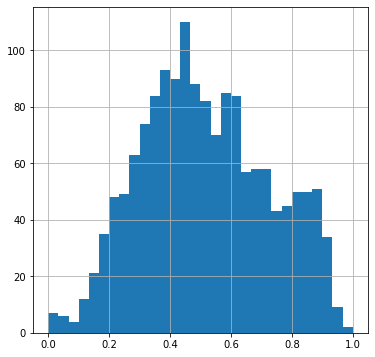

In [34]:
dfn['LifeLadder'].hist(bins=30,figsize=(6,6))
plt.show()

In [35]:
def value_of_class(values):
    cls=0
    if values <=0.2 and  values >=0:
        cls=1
    elif values <=0.4 and values >=0.2:
        cls=2
    elif values <=0.6 and values >=0.4:
        cls=3
    elif values <=0.8 and values >=0.6:
        cls=4
    elif values <=0.1 and values >=0.8:
        cls=5     
    return cls    


In [36]:
dfn['LifeLadder_class']=dfn['LifeLadder'].apply(value_of_class)
Yclass=dfn['LifeLadder_class']
dfn



,ï»؟Country,year,LifeLadder,LogGDPpercapita,Socialsupport,Healthylifeexpectancyatbirth,Freedomtomakelifechoices,Generosity,Perceptionsofcorruption,Positiveaffect,Negativeaffect,Confidenceinnationalgovernment,DemocraticQuality,DeliveryQuality,Standarddeviationofladderbycountry-year,Standarddeviation/Meanofladderbycountry-year,GINIindex(WorldBankestimate),"GINIindex(WorldBankestimate),average2000-15","giniofhouseholdincomereportedinGallup,bywp5-year",LifeLadder_class
0,1.0,2008,0.198213,0.146729,0.230189,0.295157,0.632975,0.504406,0.892847,0.266965,0.281358,0.587459,0.130014,0.113146,0.342102,0.385540,0.323945,0.398107,0.300467,1
1,1.0,2009,0.324807,0.177344,0.375989,0.305855,0.579078,0.526185,0.859462,0.381035,0.247385,0.586890,0.101330,0.117779,0.322598,0.289644,0.323945,0.398107,0.295997,2
2,1.0,2010,0.391372,0.187142,0.357007,0.315773,0.470826,0.460249,0.708347,0.440127,0.308933,0.249329,0.114439,0.121902,0.381114,0.293516,0.323945,0.398107,0.140722,2
3,1.0,2011,0.218397,0.192406,0.331229,0.325016,0.327588,0.497920,0.734022,0.428291,0.295814,0.258010,0.132690,0.122122,0.346116,0.373550,0.323945,0.398107,0.153522,2
4,1.0,2012,0.209291,0.211340,0.330559,0.333836,0.375735,0.569698,0.780971,0.598646,0.297012,0.396472,0.151751,0.171120,0.350966,0.384153,0.323945,0.398107,0.164058,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1557,0.0,2013,0.378643,0.220246,0.730234,0.288452,0.437509,0.246058,0.839318,0.601229,0.159156,0.496290,0.356577,0.142886,0.413456,0.320646,0.323945,0.511540,0.449843,2
1558,0.0,2014,0.284240,0.219800,0.682276,0.316863,0.528418,0.276867,0.828011,0.624164,0.250634,0.537869,0.366811,0.152645,0.456402,0.408377,0.323945,0.511540,0.511691,2
1559,0.0,2015,0.194406,0.218558,0.639188,0.339417,0.562994,0.228202,0.817717,0.606724,0.153640,0.563607,0.389926,0.181874,0.501290,0.517367,0.323945,0.511540,0.584942,1
1560,0.0,2016,0.200418,0.215364,0.685986,0.361971,0.653393,0.257482,0.726115,0.645540,0.201443,0.681824,0.397456,0.178710,0.718005,0.685539,0.323945,0.511540,0.505742,2


In [37]:
%matplotlib notebook
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
np.set_printoptions(precision=2)
adspy_shared_utilities='adspy_shared_utilities2.py'
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
from sklearn.svm import SVC

features = ['ï»؟Country','year','Healthylifeexpectancyatbirth','LogGDPpercapita','Socialsupport','Freedomtomakelifechoices','Generosity','Perceptionsofcorruption','Positiveaffect','Negativeaffect','Confidenceinnationalgovernment','DemocraticQuality','DeliveryQuality','Standarddeviationofladderbycountry-year','Standarddeviation/Meanofladderbycountry-year','GINIindex(WorldBankestimate)','GINIindex(WorldBankestimate),average2000-15','giniofhouseholdincomereportedinGallup,bywp5-year']
X_data = dfn[features]
y_data = dfn['LifeLadder_class']

Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_data, y_data, random_state = 0)
clfc = SVC(C=2,gamma =2.5).fit(Xc_train, yc_train)

print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clfc.score(Xc_train, yc_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clfc.score(Xc_test, yc_test)))

clfc

Accuracy of RBF-kernel SVC on training set: 0.92
Accuracy of RBF-kernel SVC on test set: 0.64


SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=2.5, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

<IPython.core.display.Javascript object>


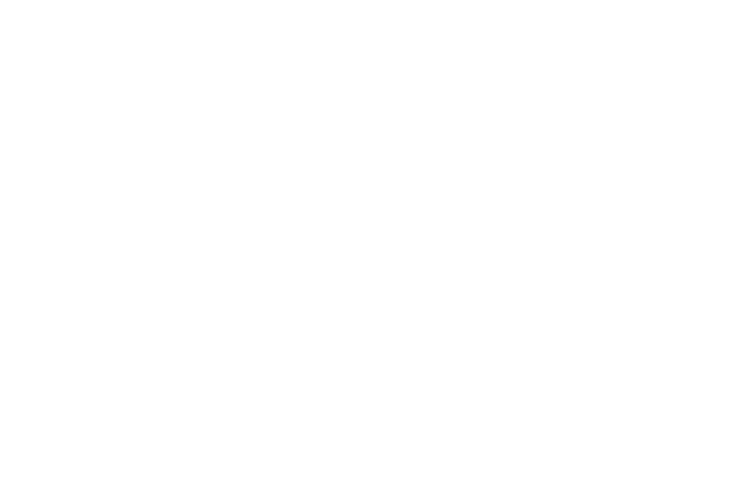

<IPython.core.display.Javascript object>


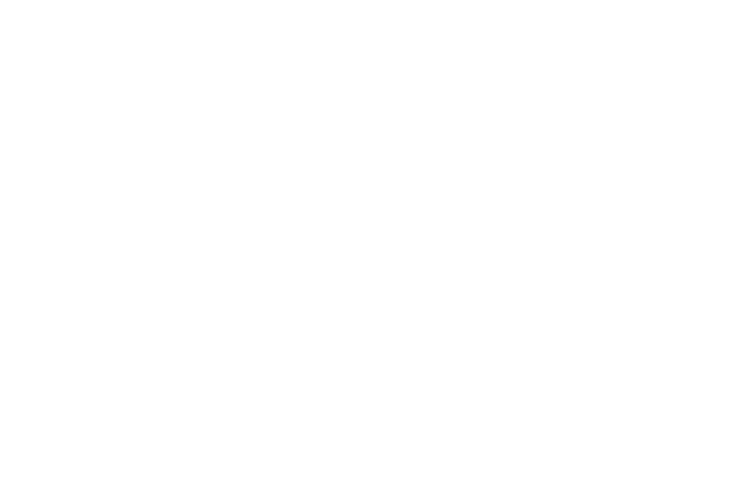

In [38]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clfc, Xc_test, yc_test) 



In [39]:
%matplotlib notebook
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
np.set_printoptions(precision=2)
adspy_shared_utilities='adspy_shared_utilities2.py'
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
from sklearn.svm import SVC

features = ['ï»؟Country','Healthylifeexpectancyatbirth','LogGDPpercapita','Socialsupport','Freedomtomakelifechoices','Generosity','Perceptionsofcorruption','Positiveaffect','Negativeaffect','Confidenceinnationalgovernment','DemocraticQuality','DeliveryQuality','Standarddeviationofladderbycountry-year','Standarddeviation/Meanofladderbycountry-year','GINIindex(WorldBankestimate)','GINIindex(WorldBankestimate),average2000-15','giniofhouseholdincomereportedinGallup,bywp5-year']
X_data = dfn[features]
y_data = dfn['LifeLadder_class']

Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_data, y_data, random_state = 0)
clfc = SVC(C=2,gamma =2.5).fit(Xc_train, yc_train)
clfc_predicted = clfc.predict(Xc_test)
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clfc.score(Xc_train, yc_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clfc.score(Xc_test, yc_test)))

clfc

Accuracy of RBF-kernel SVC on training set: 0.89
Accuracy of RBF-kernel SVC on test set: 0.81


SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=2.5, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [40]:
svm_predicted = clfc.predict(Xc_test)
confusion = confusion_matrix(yc_test, svm_predicted)

print( confusion)

[[ 34   0   0   0   7]
 [  0  11  14   0   0]
 [  0   1 104  12   0]
 [  0   0  11  98   8]
 [  5   0   0  16  70]]


<IPython.core.display.Javascript object>


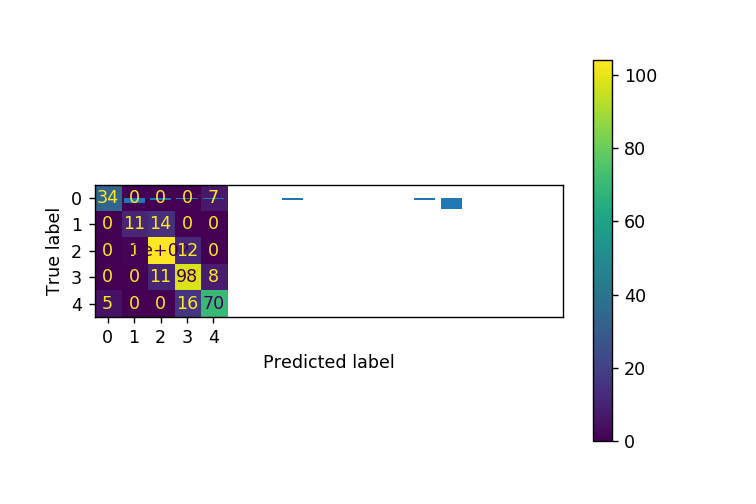

In [41]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clfc, Xc_test, yc_test) 
from sklearn.metrics import precision_recall_curve



In [42]:
from sklearn.tree import DecisionTreeClassifier
Xt_train, Xt_test, yt_train, yt_test = train_test_split(X_data, y_data,test_size=0.2, random_state = 0)
dt = DecisionTreeClassifier(max_depth=5).fit(Xt_train, yt_train)
tree_predicted = dt.predict(Xt_test)
confusion = confusion_matrix(yt_test, tree_predicted)
print('Accuracy of D_t on test set: {:.2f}'
     .format(dt.score(Xt_test, yt_test)))
print('Accuracy of D_t on test set: {:.2f}'
     .format(dt.score(Xt_train, yt_train)))

print('Decision tree classifier (max_depth = 2)\n', confusion)

Accuracy of D_t on test set: 0.74
Accuracy of D_t on test set: 0.77
Decision tree classifier (max_depth = 2)
 [[25  0  0  0  7]
 [ 0 12  9  0  0]
 [ 0  4 70 13  0]
 [ 3  0 11 68 12]
 [ 3  0  1 18 57]]


In [43]:
dt.feature_importances_

array([0.  , 0.19, 0.08, 0.03, 0.04, 0.02, 0.02, 0.07, 0.01, 0.02, 0.  ,
       0.  , 0.08, 0.43, 0.  , 0.  , 0.  ])

In [44]:
num=len(X_data.columns)

In [45]:
plt.bar(range(num),dt.feature_importances_,align='center')
plt.show()

In [46]:
feat_name=['ï»؟Country','Healthylifeexpectancyatbirth','LogGDPpercapita','Socialsupport','Freedomtomakelifechoices','Generosity','Perceptionsofcorruption','Positiveaffect','Negativeaffect','Confidenceinnationalgovernment','DemocraticQuality','DeliveryQuality','Standarddeviationofladderbycountry-year','Standarddeviation/Meanofladderbycountry-year','GINIindex(WorldBankestimate)','GINIindex(WorldBankestimate),average2000-15','giniofhouseholdincomereportedinGallup,bywp5-year']
feat_name

['ï»؟Country',
 'Healthylifeexpectancyatbirth',
 'LogGDPpercapita',
 'Socialsupport',
 'Freedomtomakelifechoices',
 'Generosity',
 'Perceptionsofcorruption',
 'Positiveaffect',
 'Negativeaffect',
 'Confidenceinnationalgovernment',
 'DemocraticQuality',
 'DeliveryQuality',
 'Standarddeviationofladderbycountry-year',
 'Standarddeviation/Meanofladderbycountry-year',
 'GINIindex(WorldBankestimate)',
 'GINIindex(WorldBankestimate),average2000-15',
 'giniofhouseholdincomereportedinGallup,bywp5-year']

In [47]:
classname=["1","2","3","4","5"]

In [48]:
print(classification_report(yc_test, clfc_predicted))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        41
           1       0.92      0.44      0.59        25
           2       0.81      0.89      0.85       117
           3       0.78      0.84      0.81       117
           4       0.82      0.77      0.80        91

    accuracy                           0.81       391
   macro avg       0.84      0.75      0.78       391
weighted avg       0.82      0.81      0.81       391



In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Micro-averaged precision = {:.2f} (treat instances equally)'
      .format(precision_score(yc_test, clfc_predicted, average = 'micro')))
print('Macro-averaged precision = {:.2f} (treat classes equally)'
      .format(precision_score(yc_test, clfc_predicted, average = 'macro')))

Micro-averaged precision = 0.81 (treat instances equally)
Macro-averaged precision = 0.84 (treat classes equally)


In [50]:
print('Micro-averaged f1 = {:.2f} (treat instances equally)'
      .format(f1_score(yc_test, clfc_predicted, average = 'micro')))
print('Macro-averaged f1 = {:.2f} (treat classes equally)'
      .format(f1_score(yc_test, clfc_predicted, average = 'macro')))

Micro-averaged f1 = 0.81 (treat instances equally)
Macro-averaged f1 = 0.78 (treat classes equally)


<IPython.core.display.Javascript object>


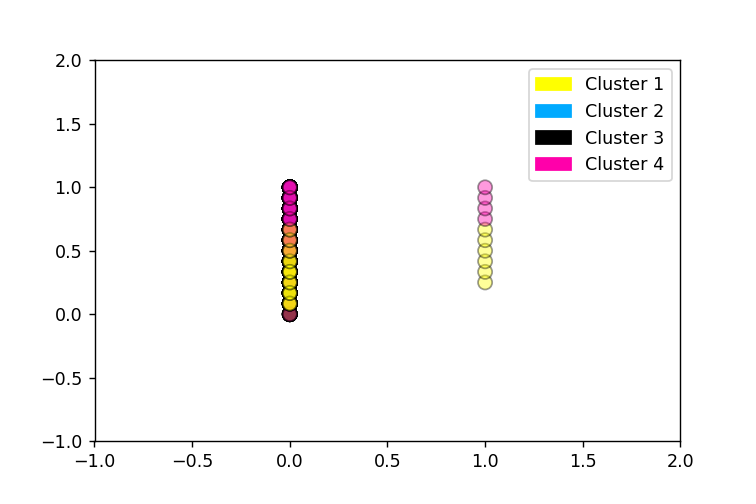

In [51]:

from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from adspy_shared_utilities import plot_labelled_scatter
x_data=dfn[['ï»؟Country','year','Healthylifeexpectancyatbirth','LogGDPpercapita','Socialsupport','Freedomtomakelifechoices','Generosity','Perceptionsofcorruption','Positiveaffect','Negativeaffect','Confidenceinnationalgovernment','DemocraticQuality','DeliveryQuality','Standarddeviationofladderbycountry-year','Standarddeviation/Meanofladderbycountry-year','GINIindex(WorldBankestimate)','GINIindex(WorldBankestimate),average2000-15','giniofhouseholdincomereportedinGallup,bywp5-year']]
Y_class=dfn['LifeLadder_class']
Y_class

X_normalized = MinMaxScaler().fit(x_data).transform(x_data)
kmeans = KMeans(n_clusters = 5)
kmeans.fit(X_normalized)
y_pred=kmeans.predict(X_normalized)
plt.figure
plot_labelled_scatter(X_normalized, kmeans.labels_, ['Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4'])


<IPython.core.display.Javascript object>


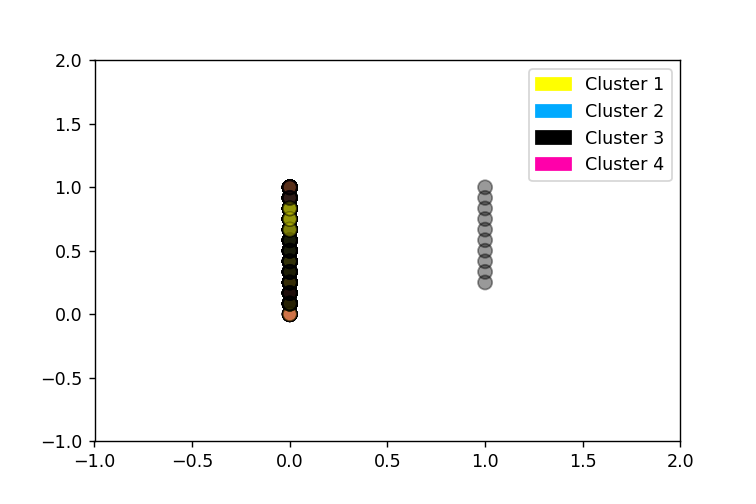

In [52]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering



cls = AgglomerativeClustering(n_clusters = 5, linkage='ward')
cls_assignment = cls.fit_predict(X_normalized)

plot_labelled_scatter(X_normalized, cls_assignment, 
        ['Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4'])

Cluster membership values:
[0 0 0 ... 0 0 0]


<IPython.core.display.Javascript object>


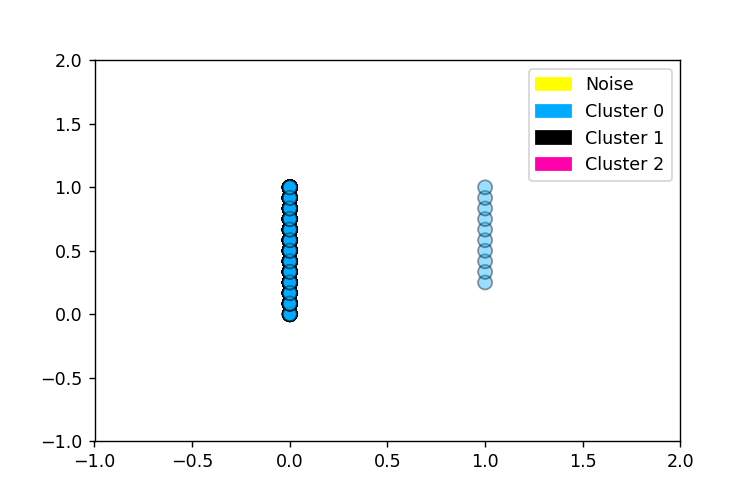

In [53]:


from sklearn.cluster import DBSCAN



dbscan = DBSCAN(eps = 20, min_samples = 40)

cls = dbscan.fit_predict(X_normalized)
print("Cluster membership values:\n{}".format(cls))

plot_labelled_scatter(X_normalized, cls + 1, 
        ['Noise', 'Cluster 0', 'Cluster 1', 'Cluster 2'])


In [54]:
from sklearn.tree import DecisionTreeClassifier
Xt_train, Xt_test, yt_train, yt_test = train_test_split(X_data, y_data,test_size=0.2, random_state = 0)
dt = DecisionTreeClassifier(max_depth=5).fit(Xt_train, yt_train)
tree_predicted = dt.predict(Xt_test)
confusion = confusion_matrix(yt_test, tree_predicted)
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(dt.score(Xt_test, yt_test)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(dt.score(Xt_train, yt_train)))

print('Decision tree classifier (max_depth = 2)\n', confusion)

FP = confusion.sum(axis=0) - np.diag(confusion)  
FN = confusion.sum(axis=1) - np.diag(confusion)
TP = np.diag(confusion)
TN = confusion.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

Accuracy of RBF-kernel SVC on test set: 0.74
Accuracy of RBF-kernel SVC on test set: 0.77
Decision tree classifier (max_depth = 2)
 [[25  0  0  0  7]
 [ 0 12  9  0  0]
 [ 0  4 70 13  0]
 [ 3  0 10 68 13]
 [ 4  0  1 18 56]]
